In [1]:
import RMextract.getRM as gt
from astropy.time import Time
import numpy as np
from astropy import units as u
from astropy.coordinates import Angle
from astropy.coordinates import EarthLocation
import os 
import IFR_subroutines as subs
import importlib as imp
import matplotlib.pyplot as plt

We will need PyEphem to perform calculations!
the accuracy of results might decease a bit
PyEphem will be used to perform calculations!


In [ ]:
# DRAO 26-m telescope location
  LAT="49:19:17.4"
  LONG="-119:37:12"
  HEIGHT=542.2

# NCP experiment
  RA = "00:00:00.0"  
  DEC = "90:00:00.0"

  OBJECT="NCP_Feb_15_2021_1day_200km_20min"

  #START_TIME="2021/02/22 00:00:00" #worked
  #END_TIME="2021/02/23 23:59:59"
  
  #START_TIME="2021/02/22 7:00:00" #didn't work
  #END_TIME="2021/02/23 7:00:00" 

  #START_TIME="2021/02/22 7:00:00" # worked
  #END_TIME="2021/02/22 16:00:00" 

  START_TIME="2021/02/15 0:00:00" # 
  END_TIME="2021/02/15 23:59:59" 

In [2]:
loc = EarthLocation(lat="49:19:17.4", lon="-119:37:12", height=542.2*u.m)
print(loc.get_itrs)

# as calculated by ALBUS based on the same coordinates:
# [-2058896.67046392 -3621369.67824459  4814351.45421717]
# seems like it's using the same function.

<bound method EarthLocation.get_itrs of <EarthLocation (-2058896.67046391, -3621369.67824459, 4814351.45421717) m>>


In [28]:
#52°54′32″N 6°52′08″
#loc = EarthLocation(lat="52:54:32.0", lon="6:52:08", height=18*u.m)

#print(loc.get_itrs)

<bound method EarthLocation.get_itrs of <EarthLocation (3827115.38249002, 461023.46541485, 5064449.42011509) m>>


In [3]:
imp.reload(subs)

ALBUS_data1 = '../../../ALBUS_ionosphere-master/examples/albus_report_parallel_RI_G03_NCP_Feb_15_2014_1day_500km_20min'
TECalbus1, STECalbus1, RMalbus1, t_hrsalbus1 = subs.read_in_fitted_models(ALBUS_data1)

ALBUS_data2 = '../../../ALBUS_ionosphere-master/examples/albus_report_parallel_RI_G03_NCP_Feb_15_2016_1day_500km_20min'
TECalbus2, STECalbus2, RMalbus2, t_hrsalbus2 = subs.read_in_fitted_models(ALBUS_data2)

ALBUS_data5 = '../../../ALBUS_ionosphere-master/examples/albus_report_parallel_RI_G03_NCP_Feb_15_2021_3day_500km_20min'
TECalbus5, STECalbus5, RMalbus5, t_hrsalbus5 = subs.read_in_fitted_models(ALBUS_data5)

102
'seq  rel_time time_width El         Az         STEC           RM (rad/m2)   VTEC factor   STEC_error\n'
['reference', 'time', 'for', 'rel_time=0:', 'year,month,day,hr,min,sec', '2014', '2', '15', '0', '0', '0.0']

102
'seq  rel_time time_width El         Az         STEC           RM (rad/m2)   VTEC factor   STEC_error\n'
['reference', 'time', 'for', 'rel_time=0:', 'year,month,day,hr,min,sec', '2016', '2', '15', '0', '0', '0.0']

246
'seq  rel_time time_width El         Az         STEC           RM (rad/m2)   VTEC factor   STEC_error\n'
['reference', 'time', 'for', 'rel_time=0:', 'year,month,day,hr,min,sec', '2021', '2', '15', '0', '0', '0.0']



In [84]:
print(len(t_hrs1))

219


In [5]:
t = Time('2014-02-15T00:00:00',format='isot',scale ='utc')
starttime = t.mjd*24*3600.  # getRM still wants MJD time in seconds (casacore definition)
endtime = starttime + 3600.*24*1 # one day of data
statpos = [loc.itrs.x.value, loc.itrs.y.value, loc.itrs.z.value]
pointing=[ 0.0,  90.*np.pi/180. ] #NCP  Ra, Dec in radians

RMdict = gt.getRM(ionexPath='./IONEXdata/', radec=pointing, timestep=1200, timerange = [starttime, endtime], stat_positions=[statpos,])

times1=RMdict['times']
RM1 = RMdict['RM']['st1']

*********** finished ionosphere predictions ***************


In [6]:
t = Time('2016-02-15T00:00:00',format='isot',scale ='utc')
starttime = t.mjd*24*3600.  # getRM still wants MJD time in seconds (casacore definition)
endtime = starttime + 3600.*24*1 # one day of data
statpos = [loc.itrs.x.value, loc.itrs.y.value, loc.itrs.z.value]
pointing=[ 0.0,  90.*np.pi/180. ] #NCP  Ra, Dec in radians

RMdict = gt.getRM(ionexPath='./IONEXdata/', radec=pointing, timestep=1200, timerange = [starttime, endtime], stat_positions=[statpos,])

times2=RMdict['times']
RM2 = RMdict['RM']['st1']

*********** finished ionosphere predictions ***************


In [7]:
t = Time('2018-02-15T00:00:00',format='isot',scale ='utc')
starttime = t.mjd*24*3600.  # getRM still wants MJD time in seconds (casacore definition)
endtime = starttime + 3600.*24*1 # one day of data
statpos = [loc.itrs.x.value, loc.itrs.y.value, loc.itrs.z.value]
pointing=[ 0.0,  90.*np.pi/180. ] #NCP  Ra, Dec in radians

RMdict = gt.getRM(ionexPath='./IONEXdata/', radec=pointing, timestep=1200, timerange = [starttime, endtime], stat_positions=[statpos,])

times3=RMdict['times']
RM3 = RMdict['RM']['st1']

*********** finished ionosphere predictions ***************


In [8]:
t = Time('2020-02-15T00:00:00',format='isot',scale ='utc')
starttime = t.mjd*24*3600.  # getRM still wants MJD time in seconds (casacore definition)
endtime = starttime + 3600.*24*1 # one day of data
statpos = [loc.itrs.x.value, loc.itrs.y.value, loc.itrs.z.value]
pointing=[ 0.0,  90.*np.pi/180. ] #NCP  Ra, Dec in radians

RMdict = gt.getRM(ionexPath='./IONEXdata/', radec=pointing, timestep=1200, timerange = [starttime, endtime], stat_positions=[statpos,])

times4=RMdict['times']
RM4 = RMdict['RM']['st1']

*********** finished ionosphere predictions ***************


In [9]:
t = Time('2021-02-15T00:00:00',format='isot',scale ='utc')
starttime = t.mjd*24*3600.  # getRM still wants MJD time in seconds (casacore definition)
endtime = starttime + 3600.*24*1 # one day of data
statpos = [loc.itrs.x.value, loc.itrs.y.value, loc.itrs.z.value]
pointing=[ 0.0,  90.*np.pi/180. ] #NCP  Ra, Dec in radians

RMdict = gt.getRM(ionexPath='./IONEXdata/', radec=pointing, timestep=1200, timerange = [starttime, endtime], stat_positions=[statpos,])

times5=RMdict['times']
RM5 = RMdict['RM']['st1']

*********** finished ionosphere predictions ***************


In [10]:
print(len(RM5))

75


In [18]:
print(len(RM1))
print(len(RM2))
print(len(RM5))
print(len(RMalbus1))
print(len(RMalbus2))
print(len(RMalbus5[0:75]))

75
75
75
75
75
75


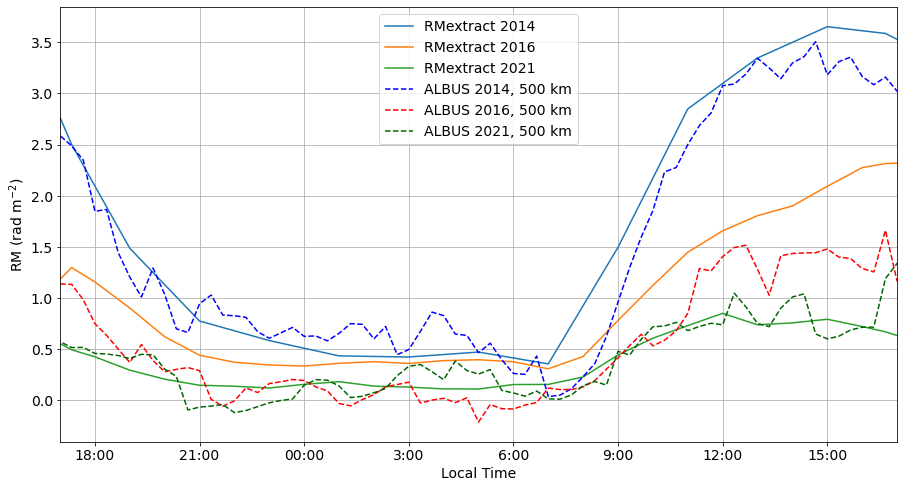

In [14]:
fs = 14

fig = plt.figure(figsize=(15,8))  

plt.plot(t_hrsalbus1,RM1,label='RMextract 2014')
plt.plot(t_hrsalbus1,RM2,label='RMextract 2016')
plt.plot(t_hrsalbus1,RM5,label='RMextract 2021')
plt.plot(t_hrsalbus1,RMalbus1,color='blue',linestyle='dashed',label='ALBUS 2014, 500 km')
plt.plot(t_hrsalbus2,RMalbus2,color='red',linestyle='dashed',label='ALBUS 2016, 500 km')
plt.plot(t_hrsalbus5,RMalbus5,color='darkgreen',linestyle='dashed',label='ALBUS 2021, 500 km')

s=10
#plt.scatter(t_hrsalbus1,RM1,s=s,color='black')
#plt.scatter(t_hrsalbus1,RM2,s=s,color='black')
#plt.scatter(t_hrsalbus1,RM5,s=s,color='black')
#plt.scatter(t_hrsalbus1,RMalbus1,s=s,color='black')
#plt.scatter(t_hrsalbus2,RMalbus2,s=s,color='black')
#plt.scatter(t_hrsalbus5,RMalbus5,s=s,color='black')


plt.xlim(-7,17)
plt.grid()
plt.legend(fontsize=fs)
plt.xlabel('Local Time',fontsize=fs)
plt.ylabel('RM (rad m$^{-2}$)',fontsize=fs)
plt.yticks(fontsize=fs)
#plt.xticks(ticks=[-6,0,6,12,18,24,30,36,42,48,54,60], 
#           labels=['18:00','00:00','6:00','12:00','18:00','00:00','6:00','12:00','18:00','00:00','6:00','12:00'],
#           fontsize=fs)
plt.xticks(ticks=[-6,-3,0,3,6,9,12,15], 
           labels=['18:00','21:00','00:00','3:00','6:00','9:00','12:00','15:00'],
           fontsize=fs)

plt.savefig('../PLOTS/ALBUS_vs_RMextract_01.pdf')

In [38]:
print(RM1[:,0].shape)
print(RMalbus1.shape)

(75,)
(75,)


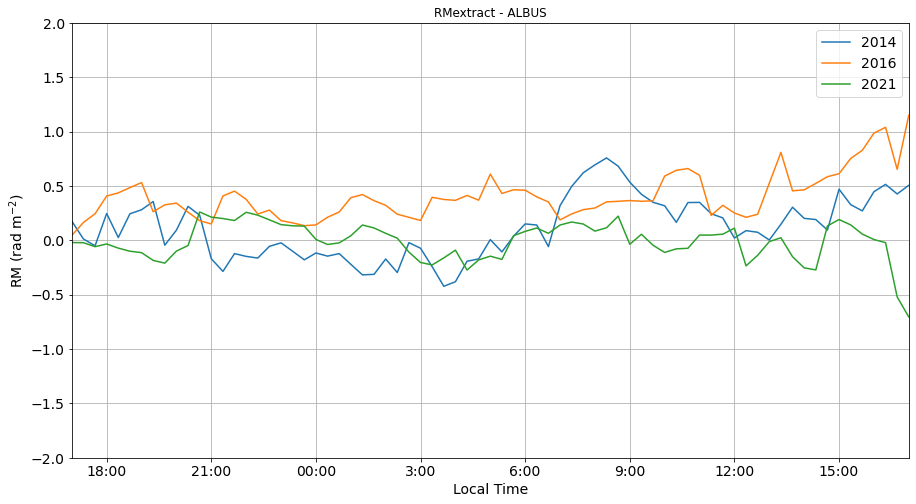

In [41]:
fs = 14

fig = plt.figure(figsize=(15,8))  

plt.plot(t_hrsalbus1,RM1[:,0]-RMalbus1,label='2014')
plt.plot(t_hrsalbus2,RM2[:,0]-RMalbus2,label='2016')
plt.plot(t_hrsalbus5[0:75],RM5[:,0]-RMalbus5[0:75],label='2021')

plt.xlim(-7,17)
plt.ylim(-2,2)
plt.grid()
plt.legend(fontsize=fs)
plt.xlabel('Local Time',fontsize=fs)
plt.ylabel('RM (rad m$^{-2}$)',fontsize=fs)
plt.yticks(fontsize=fs)
plt.title('RMextract - ALBUS')
#plt.xticks(ticks=[-6,0,6,12,18,24,30,36,42,48,54,60], 
#           labels=['18:00','00:00','6:00','12:00','18:00','00:00','6:00','12:00','18:00','00:00','6:00','12:00'],
#           fontsize=fs)
plt.xticks(ticks=[-6,-3,0,3,6,9,12,15], 
           labels=['18:00','21:00','00:00','3:00','6:00','9:00','12:00','15:00'],
           fontsize=fs)

plt.savefig('../PLOTS/ALBUS_vs_RMextract_02.pdf')